In [41]:
from   faraway.datasets import teengamb as tg, uswages
import numpy as np
import seaborn as sns

In [4]:
print(tg.DESCR)


Study of teenage gambling in Britain

Description:

     The ‘teengamb’ data frame has 47 rows and 5 columns. A survey was
     conducted to study teenage gambling in Britain.

Variables:

     This data frame contains the following columns:

     ‘sex’ 0=male, 1=female

     ‘status’ Socioeconomic status score based on parents' occupation

     ‘income’ in pounds per week

     ‘verbal’ verbal score in words out of 12 correctly defined

     ‘gamble’ expenditure on gambling in pounds per year

Source:

     Ide-Smith & Lea, 1988, Journal of Gambling Behavior, 4, 110-118



In [2]:
teen = tg.load()
teen.head()

,sex,status,income,verbal,gamble
0,1,51,2.0,8,0.0
1,1,28,2.5,8,0.0
2,1,37,2.0,6,0.0
3,1,28,7.0,4,7.3
4,1,65,2.0,8,19.6


In [5]:
teen.sex = teen.sex.apply(lambda x: 'female' if x else 'male')
teen.sex.value_counts()

male      28
female    19
Name: sex, dtype: int64

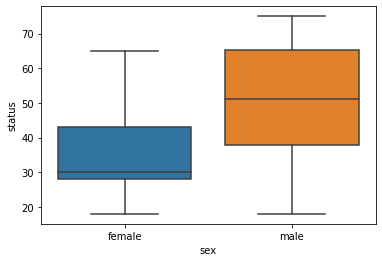

In [8]:
sns.boxplot(x='sex', y='status', data=teen);

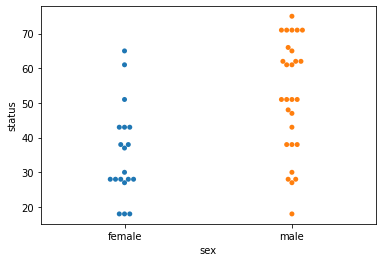

In [9]:
sns.swarmplot(x='sex', y='status', data=teen);

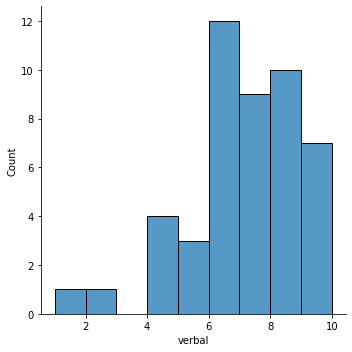

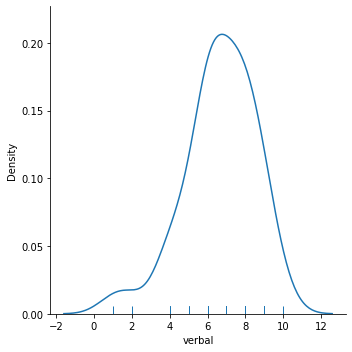

In [10]:
sns.displot(teen.verbal)
sns.displot(teen.verbal, kind='kde', rug=True);

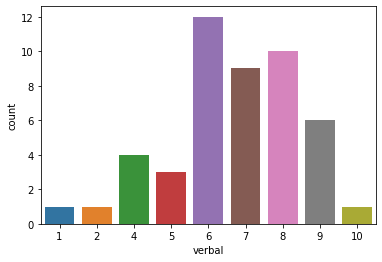

In [13]:
sns.countplot(x=teen.verbal);

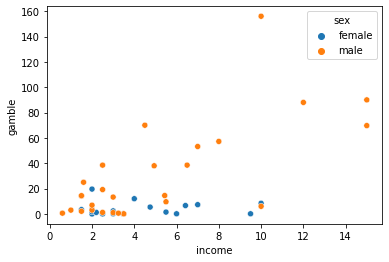

In [20]:
sns.scatterplot(x='income', y='gamble', data=teen, hue='sex');

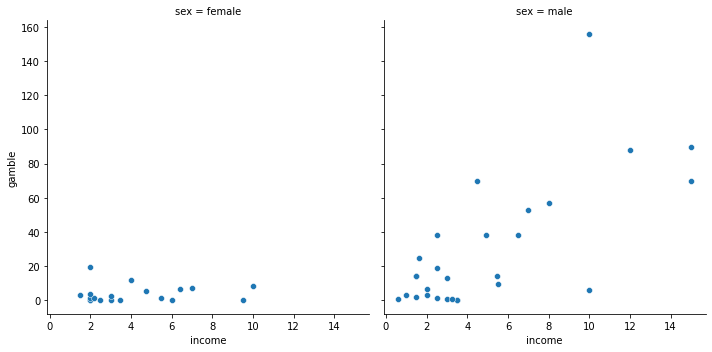

In [21]:
sns.relplot(x='income', y='gamble', data=teen, col='sex');

In [22]:
teen.describe()

,status,income,verbal,gamble
count,47.000000,47.000000,47.000000,47.000000
mean,45.234043,4.641915,6.659574,19.301064
std,17.262944,3.551371,1.856558,31.515866
min,18.000000,0.600000,1.000000,0.000000
25%,28.000000,2.000000,6.000000,1.100000
50%,43.000000,3.250000,7.000000,6.000000
75%,61.500000,6.210000,8.000000,19.400000
max,75.000000,15.000000,10.000000,156.000000


In [25]:
print(uswages.DESCR)


Weekly wages of US male workers in 1988

Description:

     The ‘uswages’ data frame has 2000 rows and 10 columns. Weekly
     Wages for US male workers sampled from the Current Population
     Survey in 1988.

Variables:

     This data frame contains the following columns:

     ‘wage’ Real weekly wages in dollars (deflated by personal
          consumption expenditures - 1992 base year)

     ‘educ’ Years of education

     ‘exper’ Years of experience

     ‘race’ 1 if Black, 0 if White (other races not in sample)

     ‘smsa’ 1 if living in Standard Metropolitan Statistical Area, 0 if
          not

     ‘ne’ 1 if living in the North East

     ‘mw’ 1 if living in the Midwest

     ‘we’ 1 if living in the West

     ‘so’ 1 if living in the South

     ‘pt’ 1 if working part time, 0 if not

Source:

     Bierens, H.J., and D. Ginther (2001): "Integrated Conditional
     Moment Testing of Quantile Regression Models", Empirical Economics
     26, 307-324



In [26]:
usw = uswages.load()
usw.head()

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
0,771.60,18,18,0,1,1,0,0,0,0
1,617.28,15,20,0,1,0,0,0,1,0
2,957.83,16,9,0,1,0,0,1,0,0
3,617.28,12,24,0,1,1,0,0,0,0
4,902.18,14,12,0,1,0,1,0,0,0


In [27]:
sub = usw[['wage', 'ne', 'mw', 'so', 'we']]
sub.head()

,wage,ne,mw,so,we
0,771.60,1,0,0,0
1,617.28,0,0,0,1
2,957.83,0,0,1,0
3,617.28,1,0,0,0
4,902.18,0,1,0,0


In [31]:
ne_mean_wage = sub[sub['ne'] == 1].wage.mean()
ne_mean_wage

631.6590829694322

In [32]:
sub.groupby('ne').agg('mean')['wage']

ne
0    601.125726
1    631.659083
Name: wage, dtype: float64

In [34]:
sub.drop('wage', axis=1).sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Length: 2000, dtype: int64

In [35]:
def region_from_dummies(row):
    regions = ['ne', 'mw', 'so', 'we']
    return regions[row[-4:].argmax()]

In [38]:
region = sub.apply(region_from_dummies, axis=1)
region

0       ne
1       we
2       so
3       ne
4       mw
        ..
1995    mw
1996    we
1997    ne
1998    ne
1999    so
Length: 2000, dtype: object

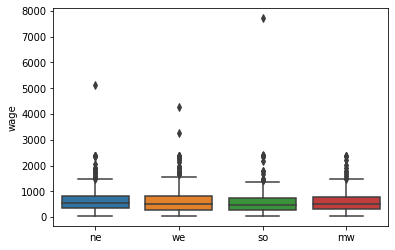

In [39]:
sns.boxplot(x=region, y=sub.wage);

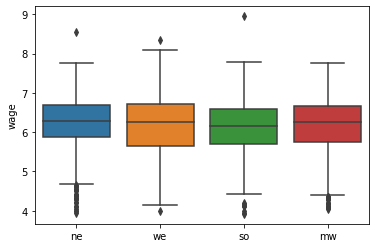

In [42]:
sns.boxplot(x=region, y=np.log(sub.wage));